In [10]:
import matplotlib.pyplot as plt
# from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, TimeDistributed, Input, MaxPooling1D
# from keras import backend as K
from loader import create_dataset, denormalize_3d

import tensorflow as tf


In [11]:
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))


In [12]:
X_train, X_test, y_train, y_test = create_dataset(input_hours=12, output_hours=3)

In [ ]:
# Build the LSTM model,
# Building the LSTM model with two LSTM layers and two Dense layers.

# Initializes a linear stack of layers in the model. In a Sequential model, each layer has exact one input tensor and one output tensor.
model = Sequential()

model.add(
  Input(shape=(720, 41))
)

model.add(
    LSTM(50, return_sequences=True)
)

model.add(
    LSTM(50, return_sequences=True)
)

model.add(MaxPooling1D(pool_size=4))

model.add(
    LSTM(50, return_sequences=True)
)

model.add(
    LSTM(180, return_sequences=True)
)

model.add(Dropout(0.1))


model.add(TimeDistributed(Dense(41, activation="relu")))  # Output layer with 1 neuron to predict the closing price.

# Compile the model,
# Compile the model using Adam optimizer and mean squared error as the loss function.
learn_rate = 0.001
# optimizer = tf.keras.optimizers.Adam(learning_rate=learn_rate)
optimizer = tf.keras.optimizers.Lion(learning_rate=learn_rate)
# optimizer = tf.keras.optimizers.Adafactor(learning_rate=learn_rate)

model.compile(
    optimizer=optimizer,
    loss="mean_squared_error",
    metrics=["mean_absolute_error", "mean_squared_error", rmse],
)


# Train the model
num_epochs = 10
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=num_epochs,
    batch_size=64,
    verbose=1,
)

# Predicting and inverse transformation to original prices
# Predicting and transforming predictions back to original scale.
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict = denormalize_3d(train_predict)
test_predict = denormalize_3d(test_predict)

Epoch 1/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 33s 161ms/step - loss: 0.0497 - mean_absolute_error: 0.1500 - mean_squared_error: 0.0497 - rmse: 0.2129 - val_loss: 0.0223 - val_mean_absolute_error: 0.0992 - val_mean_squared_error: 0.0223 - val_rmse: 0.1494
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 21s 142ms/step - loss: 0.0229 - mean_absolute_error: 0.1010 - mean_squared_error: 0.0229 - rmse: 0.1513 - val_loss: 0.0205 - val_mean_absolute_error: 0.0929 - val_mean_squared_error: 0.0205 - val_rmse: 0.1429
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 23s 151ms/step - loss: 0.0193 - mean_absolute_error: 0.0905 - mean_squared_error: 0.0193 - rmse: 0.1388 - val_loss: 0.0171 - val_mean_absolute_error: 0.0828 - val_mean_squared_error: 0.0171 - val_rmse: 0.1309
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 22s 143ms/step - loss: 0.0164 - mean_absolute_error: 0.0813 - mean_squared_error: 0.0164 - rmse: 0.1280 - val_loss: 0.0150 - val_mean_absolute_error: 0.0765 - val_mean_squared_error: 0.0150 - val_rmse: 0.1225
Epoc

In [14]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 720, 50)        │        18,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 720, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 180, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 180, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 180, 180)       │       166,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 180, 180)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 180, 41)        │         7,421 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 465,084 (1.77 MB)

 Trainable params: 232,541 (908.36 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 232,543 (908.38 KB)

In [15]:
history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'mean_squared_error', 'rmse', 'val_loss', 'val_mean_absolute_error', 'val_mean_squared_error', 'val_rmse'])

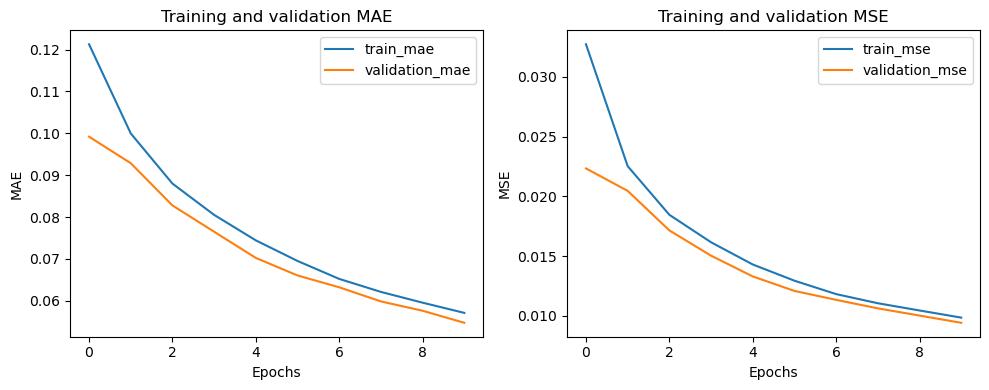

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot training & validation MAE values
ax1.plot(
    range(num_epochs), history.history["mean_absolute_error"], label="train_mae"
)
ax1.plot(
    range(num_epochs),
    history.history["val_mean_absolute_error"],
    label="validation_mae",
)
ax1.set_title("Training and validation MAE")
ax1.set_ylabel("MAE")
ax1.set_xlabel("Epochs")
ax1.legend()

# Plot training & validation MSE values
ax2.plot(
    range(num_epochs), history.history["mean_squared_error"], label="train_mse"
)
ax2.plot(
    range(num_epochs),
    history.history["val_mean_squared_error"],
    label="validation_mse",
)
ax2.set_title("Training and validation MSE")
ax2.set_ylabel("MSE")
ax2.set_xlabel("Epochs")
ax2.legend()

fig.tight_layout()
plt.show()

In [17]:
fig.savefig(f"numEpochs_{num_epochs}-learningRate_{learn_rate}.png")